In [91]:
# Study partner is Nicole Lund.  Worked on Pseudo code together and hiding api keys.
# Received assistance from instructor via office hours and tutoring sessions.
# The starter code and pseudo code for this challenge was provided and can be reviewed in data folder 
# Resources: past class assignments and Google searches
# Print log of each city: Refer to clean_city_data.df
# CSV of all retrieved data and a PNG image for each scatter plot: uploaded to output folder
# Refer to each pair of plots to see commentary regarding relationships of the linear regression. 

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
if weather_api_key == "YOUR KEY HERE!":
    import sys
    sys.path.append(r"C:\Users\Brad\Documents\GitHub\Untracked_Files")
    from api_keys_ATN import weather_api_key
print(weather_api_key)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

9ca576dc7d5026950320de9f12287dfb


## Generate Cities List

In [93]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [94]:
#Creat URL; initialize a city list and add to via forloop.  json call formatted the way you want for 1 city then work on the for loopFor loop over cities or lat/lon variable

#     # Follow code from 6.2 class; create a new cell and compare my work against their work

# # Save config information.
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"

# # Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q="
# new_query_url=query_url+cities[0]

# # new_query_url
# response = requests.get(new_query_url).json()
# response

# #Create empty list to hold city data; keep track of number of cities reviewed and group by 50 city sections
# cities_loop = []

# #Forloop-pull data using URL for each city.  When pulling out weather, will need to index list + value from dictionary

# #response['coord']['lon'] i.e. double index

# for city in cities:
#     response=requests.get(query_url+city).json()
#     try:
#         latitude = response['coord']['lat']
#         longitude= response['coord']['lon']

#         temp_max =response['main']['temp_max']
#         humidity=response['main']['humidity']
#         clouds=response['clouds']['all']
#         wind_speed=response['wind']['speed']
#         date=response['dt']

#         weather_dict = {
#             "city": city,
#             "latitude": latitude,
#             "longitude": longitude,
#             "temperature": temp_max,
#             "humidity": humidity,
#             "clouds": clouds,
#             "wind speed": wind_speed,
#             "date": date}
#         cities_loop.append(weather_dict)
#         print ('city found')

#     except:
#         print ('city not found')



In [95]:
response1 = requests.get(new_query_url).json()
response1
#add json loop

{'coord': {'lon': 102.5, 'lat': 71.9667},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': -26.23,
  'feels_like': -26.23,
  'temp_min': -26.23,
  'temp_max': -26.23,
  'pressure': 1023,
  'humidity': 100,
  'sea_level': 1023,
  'grnd_level': 1019},
 'visibility': 7087,
 'wind': {'speed': 0.67, 'deg': 156, 'gust': 0.74},
 'clouds': {'all': 100},
 'dt': 1618950568,
 'sys': {'country': 'RU', 'sunrise': 1618949616, 'sunset': 1619013809},
 'timezone': 25200,
 'id': 2022572,
 'name': 'Khatanga',
 'cod': 200}

In [96]:
#Example of output (DO NOT write code here)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [97]:
#Create DataFrame
# cities_loop_pd=pd.DataFrame(cities_loop)
# cities_loop_pd.head()

 #City data into .csv
# cities_loop_pd.to_csv('cities_loop.csv',index=False)
cities_loop_pd=pd.read_csv('cities_loop.csv')
cities_loop_pd

,city,latitude,longitude,temperature,humidity,clouds,wind speed,date
0,khatanga,71.9667,102.5000,-26.23,100,100,0.67,1618947226
1,georgetown,5.4112,100.3354,27.78,89,20,2.06,1618947118
2,butaritari,3.0707,172.7902,27.47,76,100,7.61,1618947226
3,hithadhoo,-0.6000,73.0833,27.99,66,89,2.42,1618947227
4,saskylakh,71.9167,114.0833,-27.79,100,85,0.98,1618947227
...,...,...,...,...,...,...,...,...
543,kendari,-3.9450,122.4989,23.24,94,100,1.79,1618947423
544,sarkand,45.4100,79.9186,3.58,83,99,1.13,1618947423
545,primero de enero,21.9469,-78.4283,35.00,46,20,3.60,1618947423
546,aljezur,37.3191,-8.8033,14.32,86,16,4.12,1618947424


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [98]:
#  Get the indices of cities that have humidity over 100%.
# next(x[0] for x in enumerate(L) if x[1] > 100%)

humidity_cities=cities_loop_pd['humidity']
humidity_indices=[]

for index, value in humidity_cities.items():
    if value > 100:
        humidity_indices.append(index)
        print("This city is muggy!")


In [99]:
humidity_indices

[]

In [100]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [101]:
clean_city_data=cities_loop_pd.drop(humidity_indices,inplace=False)
clean_city_data

,city,latitude,longitude,temperature,humidity,clouds,wind speed,date
0,khatanga,71.9667,102.5000,-26.23,100,100,0.67,1618947226
1,georgetown,5.4112,100.3354,27.78,89,20,2.06,1618947118
2,butaritari,3.0707,172.7902,27.47,76,100,7.61,1618947226
3,hithadhoo,-0.6000,73.0833,27.99,66,89,2.42,1618947227
4,saskylakh,71.9167,114.0833,-27.79,100,85,0.98,1618947227
...,...,...,...,...,...,...,...,...
543,kendari,-3.9450,122.4989,23.24,94,100,1.79,1618947423
544,sarkand,45.4100,79.9186,3.58,83,99,1.13,1618947423
545,primero de enero,21.9469,-78.4283,35.00,46,20,3.60,1618947423
546,aljezur,37.3191,-8.8033,14.32,86,16,4.12,1618947424


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
# Strong Linear (negative correlation) Relationship. ... The slope of the line is negative (small values of X correspond to large values of Y; large values of X correspond to small values of Y), so there is a negative co-relation (that is, a negative correlation) between X and Y.

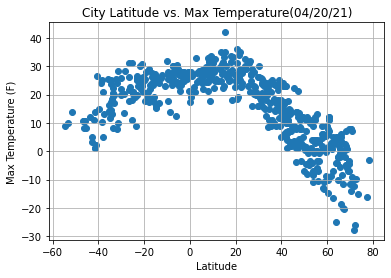

In [102]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["latitude"], clean_city_data["temperature"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(04/20/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Max_Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

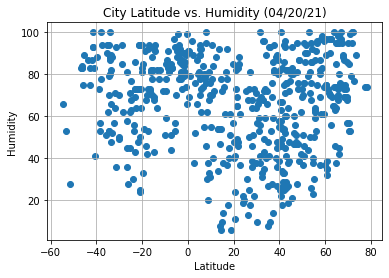

In [103]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["latitude"], clean_city_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (04/20/21)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

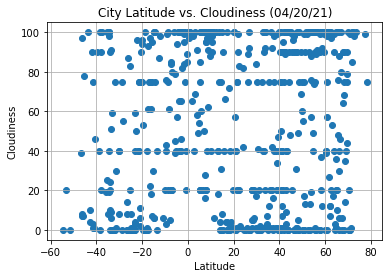

In [104]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["latitude"], clean_city_data["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (04/20/21)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

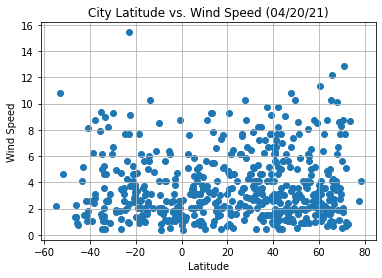

In [105]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["latitude"], clean_city_data["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (04/20/21)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Wind_Speed.png")

# Show plot
plt.show()

## Linear Regression

In [106]:
# The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

#Reference code:  Solved lesson plans for 5.3.06 & 5.3.08

#Northern Hemisphere df
Northern_Hemisphere=clean_city_data.loc[clean_city_data['latitude'] >= 0]

#Southern Hemisphere df
Southern_Hemisphere=clean_city_data.loc[clean_city_data['latitude'] < 0]
# Southern_Hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

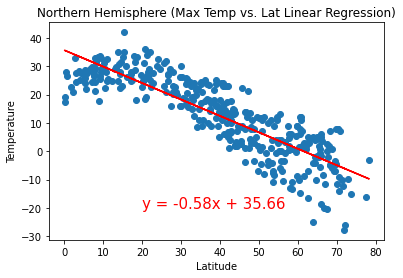

In [123]:
regression=linregress(Northern_Hemisphere['latitude'],Northern_Hemisphere['temperature'])
regress_values = Northern_Hemisphere['latitude'] * regression[0] + regression[1]
plt.scatter(Northern_Hemisphere['latitude'],Northern_Hemisphere['temperature'])
plt.plot(Northern_Hemisphere['latitude'],regress_values,"r-")
line_eq = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

#Formatting
plt.annotate(line_eq,(20,-20),fontsize=15,color="red")
plt.title('Northern Hemisphere (Max Temp vs. Lat Linear Regression)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

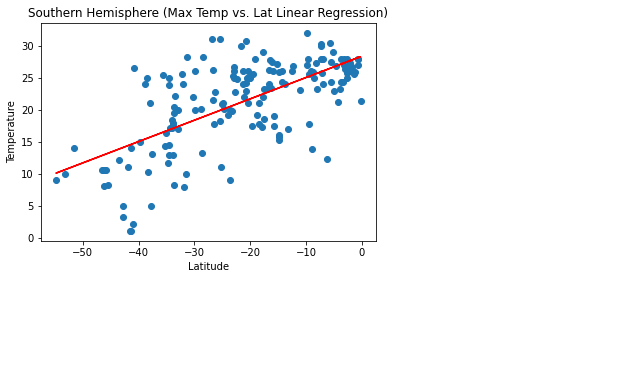

In [114]:
regression=linregress(Southern_Hemisphere['latitude'],Southern_Hemisphere['temperature'])
regress_values = Southern_Hemisphere['latitude'] * regression[0] + regression[1]
plt.scatter(Southern_Hemisphere['latitude'],Southern_Hemisphere['temperature'])
plt.plot(Southern_Hemisphere['latitude'],regress_values,"r-")
line_eq = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

#Formatting
plt.annotate(line_eq,(20,-20),fontsize=15,color="red")
plt.title('Southern Hemisphere (Max Temp vs. Lat Linear Regression)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [ ]:
Relationship:  The correlation coefficients relative to temperature has a strong relationship for the Northern Hemisphere versus the Southern Hemisphere.  The slope for the Northern Hemisphere is negative, while the slope for the Southern Hemisphere is positive

In [ ]:
####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

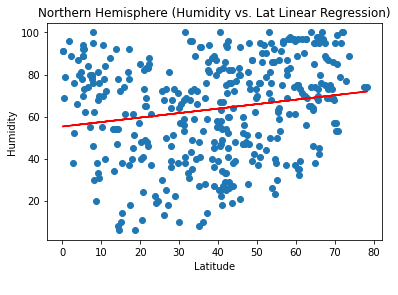

In [115]:
regression=linregress(Northern_Hemisphere['latitude'],Northern_Hemisphere['humidity'])
regress_values = Northern_Hemisphere['latitude'] * regression[0] + regression[1]
plt.scatter(Northern_Hemisphere['latitude'],Northern_Hemisphere['humidity'])
plt.plot(Northern_Hemisphere['latitude'],regress_values,"r-")
line_eq = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

#Formatting
plt.annotate(line_eq,(20,-20),fontsize=15,color="red")
plt.title('Northern Hemisphere (Humidity vs. Lat Linear Regression)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

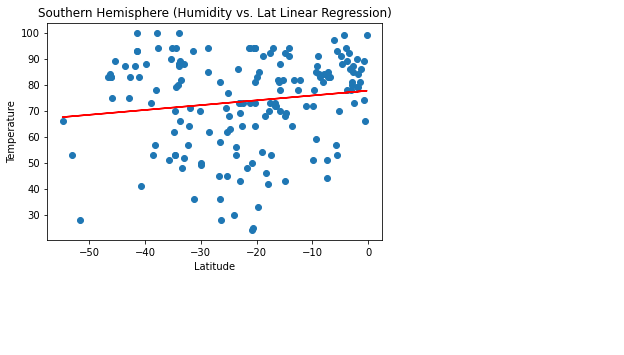

In [116]:
regression=linregress(Southern_Hemisphere['latitude'],Southern_Hemisphere['humidity'])
regress_values = Southern_Hemisphere['latitude'] * regression[0] + regression[1]
plt.scatter(Southern_Hemisphere['latitude'],Southern_Hemisphere['humidity'])
plt.plot(Southern_Hemisphere['latitude'],regress_values,"r-")
line_eq = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

#Formatting
plt.annotate(line_eq,(20,-20),fontsize=15,color="red")
plt.title('Southern Hemisphere (Humidity vs. Lat Linear Regression)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [ ]:
Relationship:  While both linear relationships pictured are positive, the Northern Hemisphere has a greater slope relative to humidity.

In [ ]:
####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

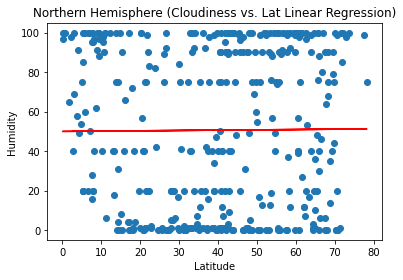

In [117]:
regression=linregress(Northern_Hemisphere['latitude'],Northern_Hemisphere['clouds'])
regress_values = Northern_Hemisphere['latitude'] * regression[0] + regression[1]
plt.scatter(Northern_Hemisphere['latitude'],Northern_Hemisphere['clouds'])
plt.plot(Northern_Hemisphere['latitude'],regress_values,"r-")
line_eq = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

#Formatting
plt.annotate(line_eq,(20,-20),fontsize=15,color="red")
plt.title('Northern Hemisphere (Cloudiness vs. Lat Linear Regression)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

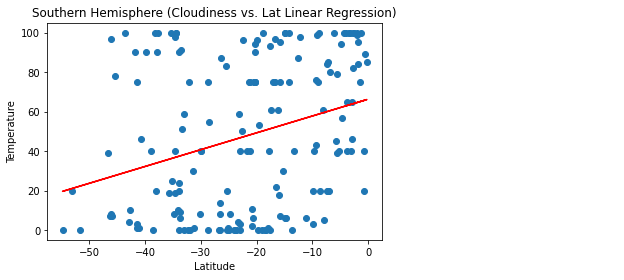

In [118]:
regression=linregress(Southern_Hemisphere['latitude'],Southern_Hemisphere['clouds'])
regress_values = Southern_Hemisphere['latitude'] * regression[0] + regression[1]
plt.scatter(Southern_Hemisphere['latitude'],Southern_Hemisphere['clouds'])
plt.plot(Southern_Hemisphere['latitude'],regress_values,"r-")
line_eq = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

#Formatting
plt.annotate(line_eq,(20,-20),fontsize=15,color="red")
plt.title('Southern Hemisphere (Cloudiness vs. Lat Linear Regression)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [ ]:
Relationship:  The Southern Hemisphere linear relationships is positive, while the Northern Hemisphere remains flat relative to cloudiness.

In [ ]:
####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

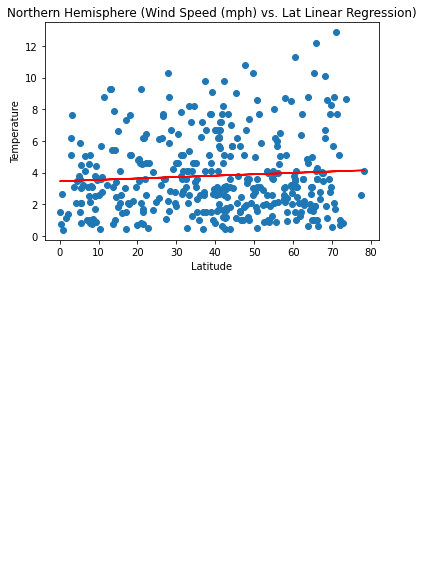

In [122]:
regression=linregress(Northern_Hemisphere['latitude'],Northern_Hemisphere['wind speed'])
regress_values = Northern_Hemisphere['latitude'] * regression[0] + regression[1]
plt.scatter(Northern_Hemisphere['latitude'],Northern_Hemisphere['wind speed'])
plt.plot(Northern_Hemisphere['latitude'],regress_values,"r-")
line_eq = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

#Formatting
plt.annotate(line_eq,(20,-20),fontsize=15,color="red")
plt.title('Northern Hemisphere (Wind Speed (mph) vs. Lat Linear Regression)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [ ]:
####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

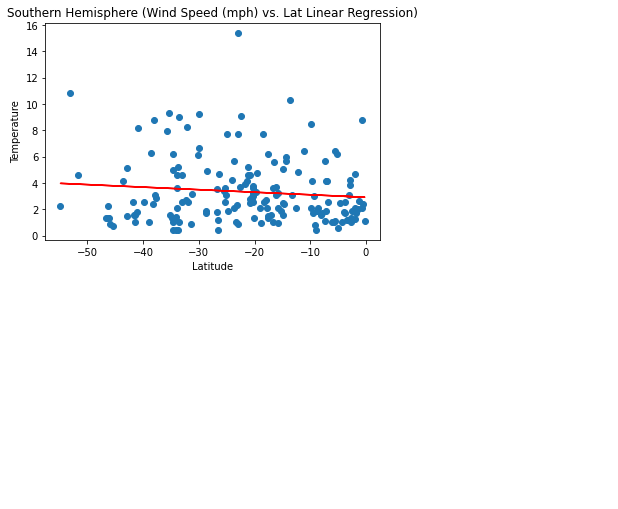

In [121]:
regression=linregress(Southern_Hemisphere['latitude'],Southern_Hemisphere['wind speed'])
regress_values = Southern_Hemisphere['latitude'] * regression[0] + regression[1]
plt.scatter(Southern_Hemisphere['latitude'],Southern_Hemisphere['wind speed'])
plt.plot(Southern_Hemisphere['latitude'],regress_values,"r-")
line_eq = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

#Formatting
plt.annotate(line_eq,(20,-20),fontsize=15,color="red")
plt.title('Southern Hemisphere (Wind Speed (mph) vs. Lat Linear Regression)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [ ]:
Relationship:  Northern linear relationships is relatively flat while the Southern Hemisphere is negative relative to wind speed.